In [23]:
import torch
import torch.nn.init
from torch.autograd import Variable

In [24]:
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(8)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

## Loading MNIST dataset

In [26]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


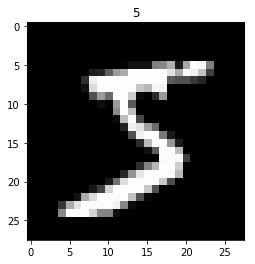

In [27]:
print(mnist_train.train_data.size())
print(mnist_train.train_labels.size())

idx=0
plt.imshow(mnist_train.train_data[idx,:,:].numpy(), cmap='gray')
plt.title('%i' % mnist_train.train_labels[idx])

## Data Loader

In [28]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

torch.Size([100, 1, 28, 28])
torch.Size([100])


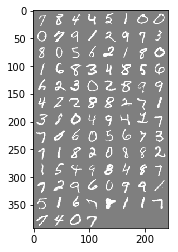

array([7, 8, 4, 4, 5, 1, 0, 0, 0, 7, 9, 1, 2, 9, 7, 3, 8, 0, 5, 6, 2, 1, 8,
       0, 1, 6, 8, 3, 4, 8, 5, 6, 6, 2, 3, 0, 2, 8, 9, 9, 4, 2, 2, 8, 8, 2,
       7, 1, 3, 8, 0, 4, 9, 4, 1, 7, 7, 0, 6, 0, 5, 6, 7, 3, 7, 1, 8, 2, 0,
       8, 8, 2, 1, 5, 4, 9, 8, 4, 8, 7, 7, 2, 9, 6, 0, 9, 9, 1, 5, 1, 6, 7,
       8, 1, 1, 7, 7, 4, 0, 7])

In [29]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())

#숫자 100개 표시
imshow(utils.make_grid(batch_images))
batch_labels.numpy()

## Define Neural Network

In [32]:
linear1 = torch.nn.Linear(784, 512, bias = True)
linear2 = torch.nn.Linear(512, 10, bias = True)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(linear1, relu, linear2)

print(model)

Sequential (
  (0): Linear (784 -> 512)
  (1): ReLU ()
  (2): Linear (512 -> 10)
)


In [33]:
cost_func = torch.nn.CrossEntropyLoss()
# Softmax 내장

## Mdel Training

In [34]:
learning_rate = 0.001
training_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        optimizer.zero_grad()
        Y_prediction = model(X)
        cost = cost_func(Y_prediction, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data[0]))
    
print("Learning Ginished!")

[Epoch:    1] cost = 0.290614992
[Epoch:    2] cost = 0.114831313
[Epoch:    3] cost = 0.0754425824
[Epoch:    4] cost = 0.0540926158
[Epoch:    5] cost = 0.0393337533
Learning Ginished!


In [37]:
#model.load_state_dict(torch.load('NN.pkl'))
#model.state_dict()

## Measure performance

In [38]:
correct = 0
total = 0
for images, labels in mnist_test:
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


## Random test

In [44]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

Label :  [3]
Prediction :  [3]


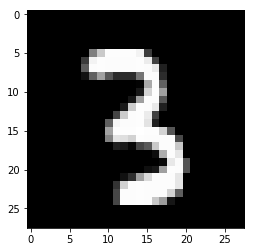

In [55]:
single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())

0


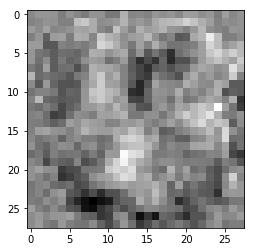

1


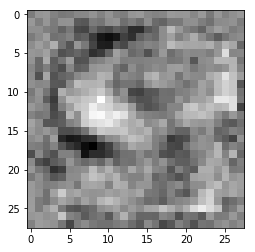

2


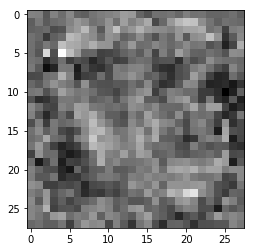

3


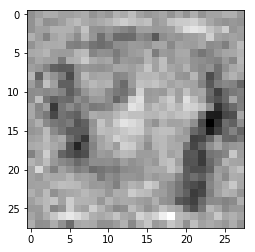

4


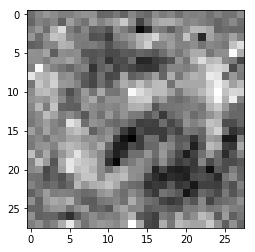

5


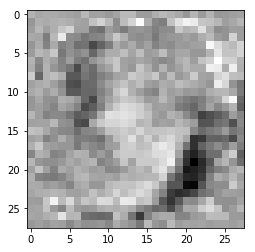

6


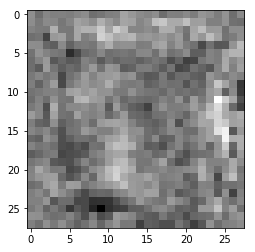

7


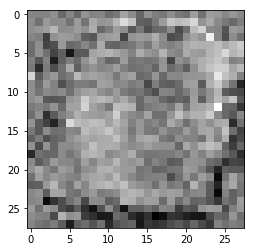

8


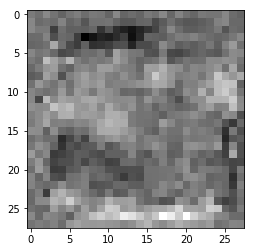

9


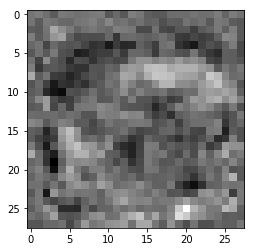

10


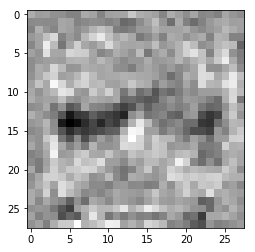

11


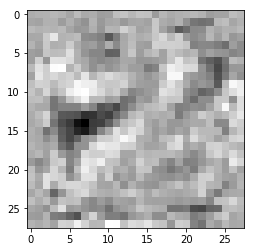

12


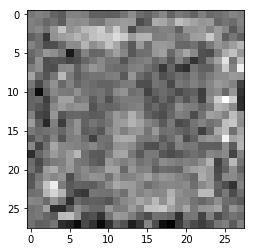

13


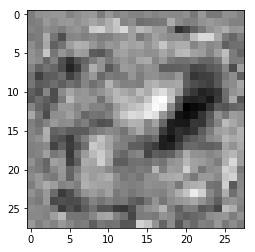

14


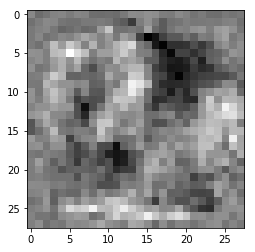

15


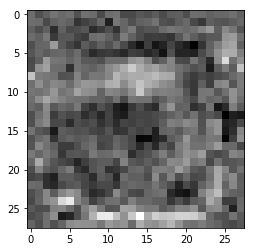

16


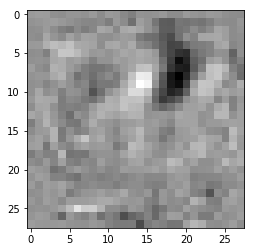

17


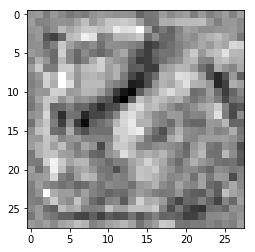

18


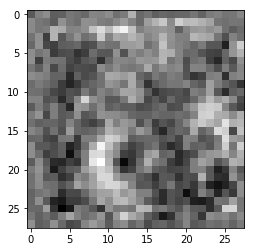

19


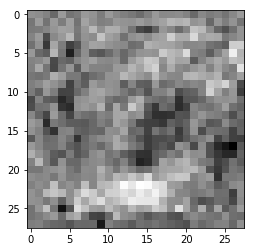

In [59]:
for i in range(20):
    weight = model[0].weight[i, :].data.view(28,28)
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    print(i)
    plt.imshow(weight.numpy(), cmap='gray')
    plt.show()